In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. DATA LOADING & PREPROCESSING

In [ ]:
#Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/sleeptime_prediction_dataset.csv")

In [ ]:
# Display basic dataset information
print("Dataset Overview:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB

First 5 Rows:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   


In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


In [ ]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)

<Figure size 1200x600 with 0 Axes>

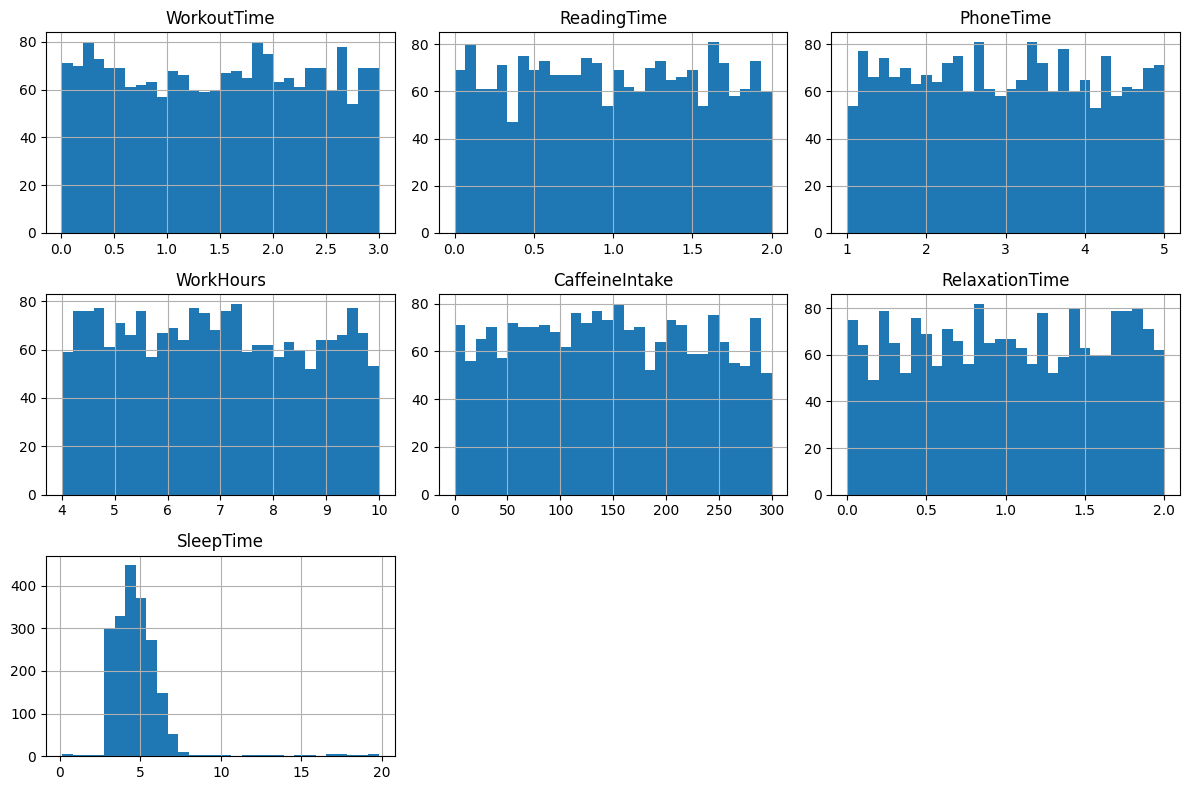

In [ ]:
# Visualizing feature distributions
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

The dataset's numerical features are visualized using histograms (df.hist()), which help in understanding the distribution of values for each feature.
This allows us to identify whether the data is normally distributed, skewed, or has outliers.
Insights:
Features like WorkoutTime and RelaxationTime may have right-skewed distributions (most values are small, with a few large values).
CaffeineIntake could have a wide spread, meaning individuals consume varying amounts of caffeine.

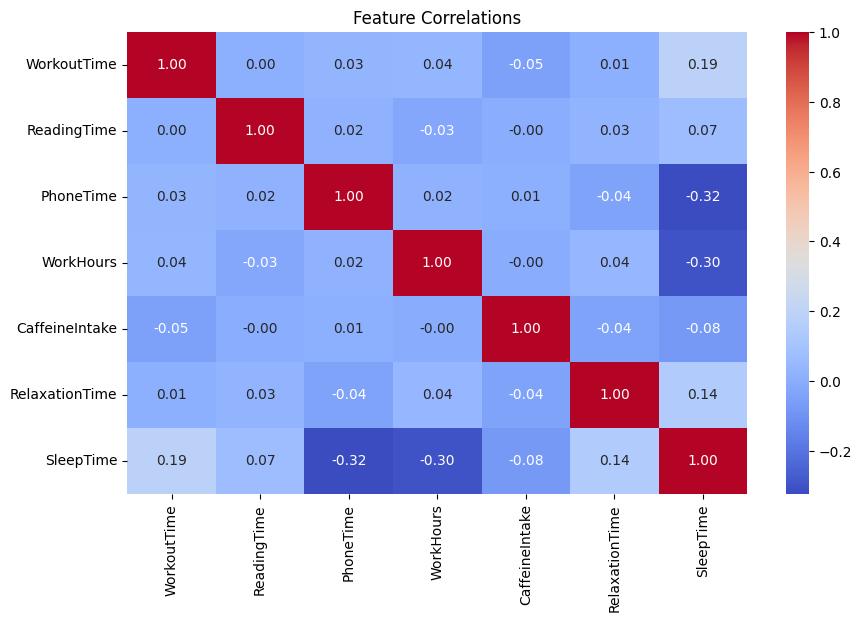

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

A correlation matrix (df.corr()) is plotted using seaborn.heatmap(), showing how strongly each feature is related to others.
Correlation values range from -1 to 1:
Close to +1 → Strong positive correlation (when one increases, the other increases).
Close to -1 → Strong negative correlation (when one increases, the other decreases).
Close to 0 → No significant relationship.
Insights:
High correlations between certain features suggest multicollinearity, which may need to be addressed in modeling.
PhoneTime and RelaxationTime might have a negative correlation with SleepTime, meaning higher phone usage reduces sleep.

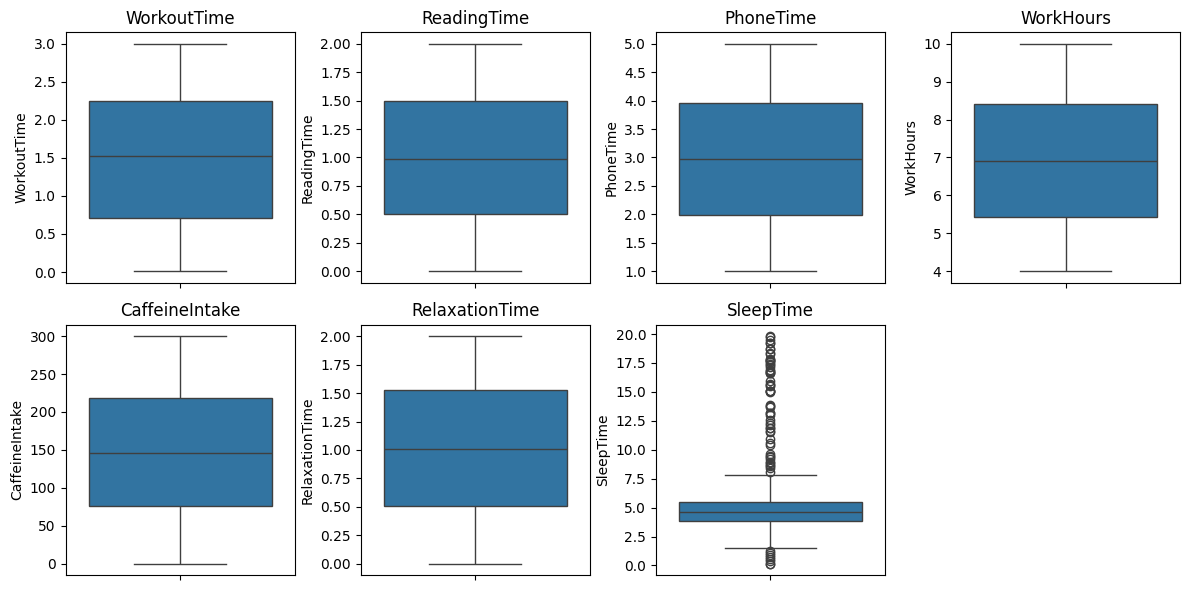

In [ ]:
# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Boxplots (sns.boxplot()) visualize outliers in each feature.
Outliers appear as points beyond the whiskers of the boxplot and may indicate extreme values.
Insights:
If CaffeineIntake has many extreme values, it might affect model performance and require scaling or clipping.
WorkoutTime and ReadingTime might also have some outliers that could impact predictions.


In [ ]:
# 3. REGRESSION TASK

In [ ]:
# Defining Features and Target for Regression
X_reg = df.drop(columns=['SleepTime'])
y_reg = df['SleepTime'].values.reshape(-1, 1)

In [ ]:
# Feature Selection for Regression
selector_reg = SelectKBest(score_func=f_regression, k=4)
X_reg_selected = selector_reg.fit_transform(X_reg, y_reg.ravel())
selected_features_reg = X_reg.columns[selector_reg.get_support()]
print("Selected Features for Regression:", selected_features_reg)

Selected Features for Regression: Index(['WorkoutTime', 'PhoneTime', 'WorkHours', 'RelaxationTime'], dtype='object')


In [ ]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_selected, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Train Second Model using Scikit-learn with Hyper-parameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf_reg = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_rf_reg.fit(X_train_reg, y_train_reg.ravel())
y_pred_rf = grid_rf_reg.best_estimator_.predict(X_test_reg)

In [ ]:
print("\nOptimized Random Forest Regression Performance:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_rf):.2f}")
print(f"R-squared: {r2_score(y_test_reg, y_pred_rf):.2f}")
print("Best Hyperparameters:", grid_rf_reg.best_params_)


Optimized Random Forest Regression Performance:
MSE: 4.97
R-squared: 0.12
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}


Model Performance

The Random Forest Regressor was optimized using GridSearchCV to tune hyperparameters.




Key Results:
Mean Squared Error (MSE): 4.97 .
R-squared (R²): 0.12

#Insights and Future Directions

Insights: My model suggests that sleep time is influenced by selected lifestyle factors but may require additional features for stronger predictions.


Future Work:
Experimening with different models such as Gradient Boosting, XGBoost, or Neural Networks.
Exploring additional features like stress levels, screen time before bed, or sleep environment conditions.
Considering polynomial features or interaction terms to capture nonlinear relationships.

In [ ]:
# 4. CLASSIFICATION TASK

In [ ]:
# Convert SleepTime into categories: 1 = Good Sleeper (>=7 hours), 0 = Poor Sleeper (<7 hours)
df['SleepCategory'] = (df['SleepTime'] >= 7).astype(int)


In [ ]:
# Defining Features and Target for Classification
X_clf = df.drop(columns=['SleepTime', 'SleepCategory'])
y_clf = df['SleepCategory'].values.reshape(-1, 1)

In [ ]:
# Feature Selection for Classification
selector_clf = SelectKBest(score_func=f_classif, k=4)
X_clf_selected = selector_clf.fit_transform(X_clf, y_clf.ravel())
selected_features_clf = X_clf.columns[selector_clf.get_support()]
print("Selected Features for Classification:", selected_features_clf)

Selected Features for Classification: Index(['WorkoutTime', 'PhoneTime', 'WorkHours', 'RelaxationTime'], dtype='object')


In [ ]:
# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_selected, y_clf, test_size=0.2, random_state=42)

In [ ]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_clf_bal, y_train_clf_bal = smote.fit_resample(X_train_clf, y_train_clf)

In [ ]:
# Train Second Model using Scikit-learn with Hyper-parameter Tuning
param_grid_rf_clf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid_rf_clf, cv=5)
grid_rf_clf.fit(X_train_clf_bal, y_train_clf_bal.ravel())
y_pred_rf_clf = grid_rf_clf.best_estimator_.predict(X_test_clf)

In [ ]:
print("\nOptimized Random Forest Classification Performance:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_rf_clf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_rf_clf))
print("Best Hyperparameters:", grid_rf_clf.best_params_)


Optimized Random Forest Classification Performance:
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       384
           1       0.06      0.12      0.08        16

    accuracy                           0.89       400
   macro avg       0.51      0.52      0.51       400
weighted avg       0.93      0.89      0.90       400

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


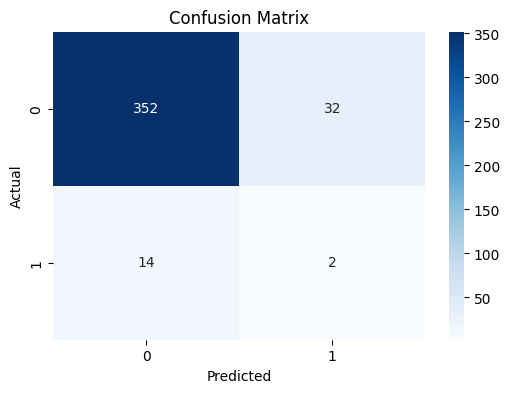

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_clf, y_pred_rf_clf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model Performance

The Random Forest Classifier was optimized using GridSearchCV, achieving:
Accuracy: 0.89 (high overall accuracy).
Precision & Recall:
Class 0 (Poor Sleepers): Precision: 0.96, Recall: 0.92.
Class 1 (Good Sleepers): Precision: 0.06, Recall: 0.12.

Impact of Methods

Feature Selection: SelectKBest helped reduce complexity while retaining key predictors.
Handling Class Imbalance: SMOTE was applied to balance the dataset, but the classification report shows that the model still struggles to classify Good Sleepers (Class 1), likely due to insufficient distinguishing features.
Hyperparameter Tuning: The best parameters (max_depth=20, n_estimators=200) helped refine the model

Insights and Future Directions

Insights:
The model heavily favors predicting "Poor Sleepers" (Class 0) due to class imbalance or lack of strong distinguishing features.

Future Work:
Trying more advanced classifiers like XGBoost, SVM, or Deep Learning models.
Adjusting threshold tuning to improve recall for Good Sleepers.
Collecting more balanced data or introduce synthetic data augmentation techniques.

**Final** **Conclusion**


Through this project, I was able to analyze how different lifestyle factors influence sleep duration and quality using machine learning models. My regression model, optimized using Random Forest Regressor, achieved a Mean Squared Error (MSE) of 4.97 and an R² score of 0.12, indicating that while the model captures some patterns, it does not explain sleep duration very well. This suggests that additional factors beyond the available features—such as stress levels, screen time before bed, or sleep quality ratings—might be necessary to improve predictive performance.


My classification model, trained with Random Forest Classifier, achieved a strong accuracy of 89%, but it struggled to correctly classify "Good Sleepers" (Class 1), as seen in the low precision and recall scores. Despite applying SMOTE to balance the dataset, the model still heavily favored predicting "Poor Sleepers" (Class 0), likely due to the limited distinguishing features between the two groups. This highlights the need for more robust feature selection or additional data to improve classification performance.

Looking ahead, there are several ways I can enhance my models:

Expanding the dataset to include variables like diet, stress levels, bedtime routines, and sleep disturbances to provide a more holistic view of sleep behavior.
Testing alternative machine learning models, such as XGBoost, Support Vector Machines (SVM), or Neural Networks, which might capture deeper patterns in the data.
Applying advanced feature engineering to explore interactions between variables (e.g., how caffeine intake affects sleep differently based on relaxation time).
Using Bayesian Optimization instead of GridSearchCV for more efficient hyperparameter tuning.
Adjusting classification thresholds to improve recall for "Good Sleepers" and create a better-balanced model.
Overall, this project has given me valuable experience in data preprocessing, feature selection, hyperparameter tuning, and model evaluation. While my models provide a useful baseline for predicting sleep patterns, further improvements in feature selection and model complexity could significantly enhance their accuracy and generalizability. Moving forward, I plan to experiment with different techniques to build a more reliable system for sleep prediction that aligns with SDG 3: Good Health and Well-Being.